In [1]:
import sys
import numpy as np
import torch

from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.functional import F
import torch.nn as nn

sys.path.append('../')
from utils_modules.models import Expander, vector_to_Cov
from utils_modules.vicreg import vicreg_loss
import utils_modules.data as utils_data
import utils_modules.baryons_toy_Pk as utils_toy_Pk

# plot formatting 
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **font)

rcnew = {"mathtext.fontset" : "cm", 
         "text.usetex": False,
         
         'figure.frameon': True,
         'axes.linewidth': 2.,
         
         "axes.titlesize" : 32, 
         "axes.labelsize" : 28,
         "legend.fontsize" : 28,
         'legend.fancybox': True,
         'lines.linewidth': 2.5,
         
         'xtick.alignment': 'center',
          'xtick.bottom': True,
          'xtick.color': 'black',
          'xtick.direction': 'in',
          'xtick.labelbottom': True,
          'xtick.labelsize': 24, #17.5,
          'xtick.labeltop': False,
          'xtick.major.bottom': True,
          'xtick.major.pad': 6.0,
          'xtick.major.size': 14.0,
          'xtick.major.top': True,
          'xtick.major.width': 1.5,
          'xtick.minor.bottom': True,
          'xtick.minor.pad': 3.4,
          'xtick.minor.size': 7.0,
          'xtick.minor.top': True,
          'xtick.minor.visible': True,
          'xtick.minor.width': 1.0,
          'xtick.top': True,
         
          'ytick.alignment': 'center_baseline',
          'ytick.color': 'black',
          'ytick.direction': 'in',
          'ytick.labelleft': True,
          'ytick.labelright': False,
          'ytick.labelsize': 24, #17.5,
          'ytick.left': True,
          'ytick.major.left': True,
          'ytick.major.pad': 6.0,
          'ytick.major.right': True,
          'ytick.major.size': 14.0,
          'ytick.major.width': 1.5,
          'ytick.minor.left': True,
          'ytick.minor.pad': 3.4,
          'ytick.minor.right': True,
          'ytick.minor.size': 7.0,
          'ytick.minor.visible': True,
          'ytick.minor.width': 1.0,
          'ytick.right': True
         
        }


plt.rcParams.update(rcnew)
plt.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'


In [4]:
kmin  = 7e-3 #h/Mpc
kmax = 1

kF     = kmin
k_bins = int((kmax-kmin)/kF)
k      = np.arange(3,k_bins+2)*kF 
Nk     = 4.0*np.pi*k**2*kF/kF**3  #number of modes in each k-bin

# model parameters
predict_D     = True
Pk_continuous = True #whether fix A_value for kpivot or not

dset_size = 1
seed = 1
splits = 1

In [5]:
params = np.array([6., -0.4, 6*(0.5)**(-0.4-0.25),0.25]).reshape(dset_size, splits, -1)
Pk = utils_toy_Pk.get_Pk_arr(k, Nk, params, predict_D = True)
Pk_SPL = utils_toy_Pk.get_Pk_arr(k, Nk, params, predict_D = False)
assert params.shape[0:2] == (dset_size, splits)
assert Pk.shape[0:2] == (dset_size, splits)



In [ ]:
plt.figure(figsize = (12, 8))
plt.axvline(0.5, c = 'k', 
            ls = '--', 
            label = r'$k_{\mathrm{pivot}}$')
plt.loglog(k, Pk_SPL[0, 0], label='Simple Power Law', 
           c = 'forestgreen',)
plt.loglog(k, Pk[0, 0], label='Broken Power Law', 
           c = 'coral',)

plt.xlabel(r'$ k \, \left[h^{-1} \, \mathrm{Mpc}\right] $')
plt.ylabel(r'$ P \, (k) \, \left[h^{3} \, \mathrm{Mpc}^{-3}\right] $')
plt.legend(loc = 'best')
#plt.savefig('plots_new/example_Pk.pdf', bbox_inches='tight', pad_inches=0.2)

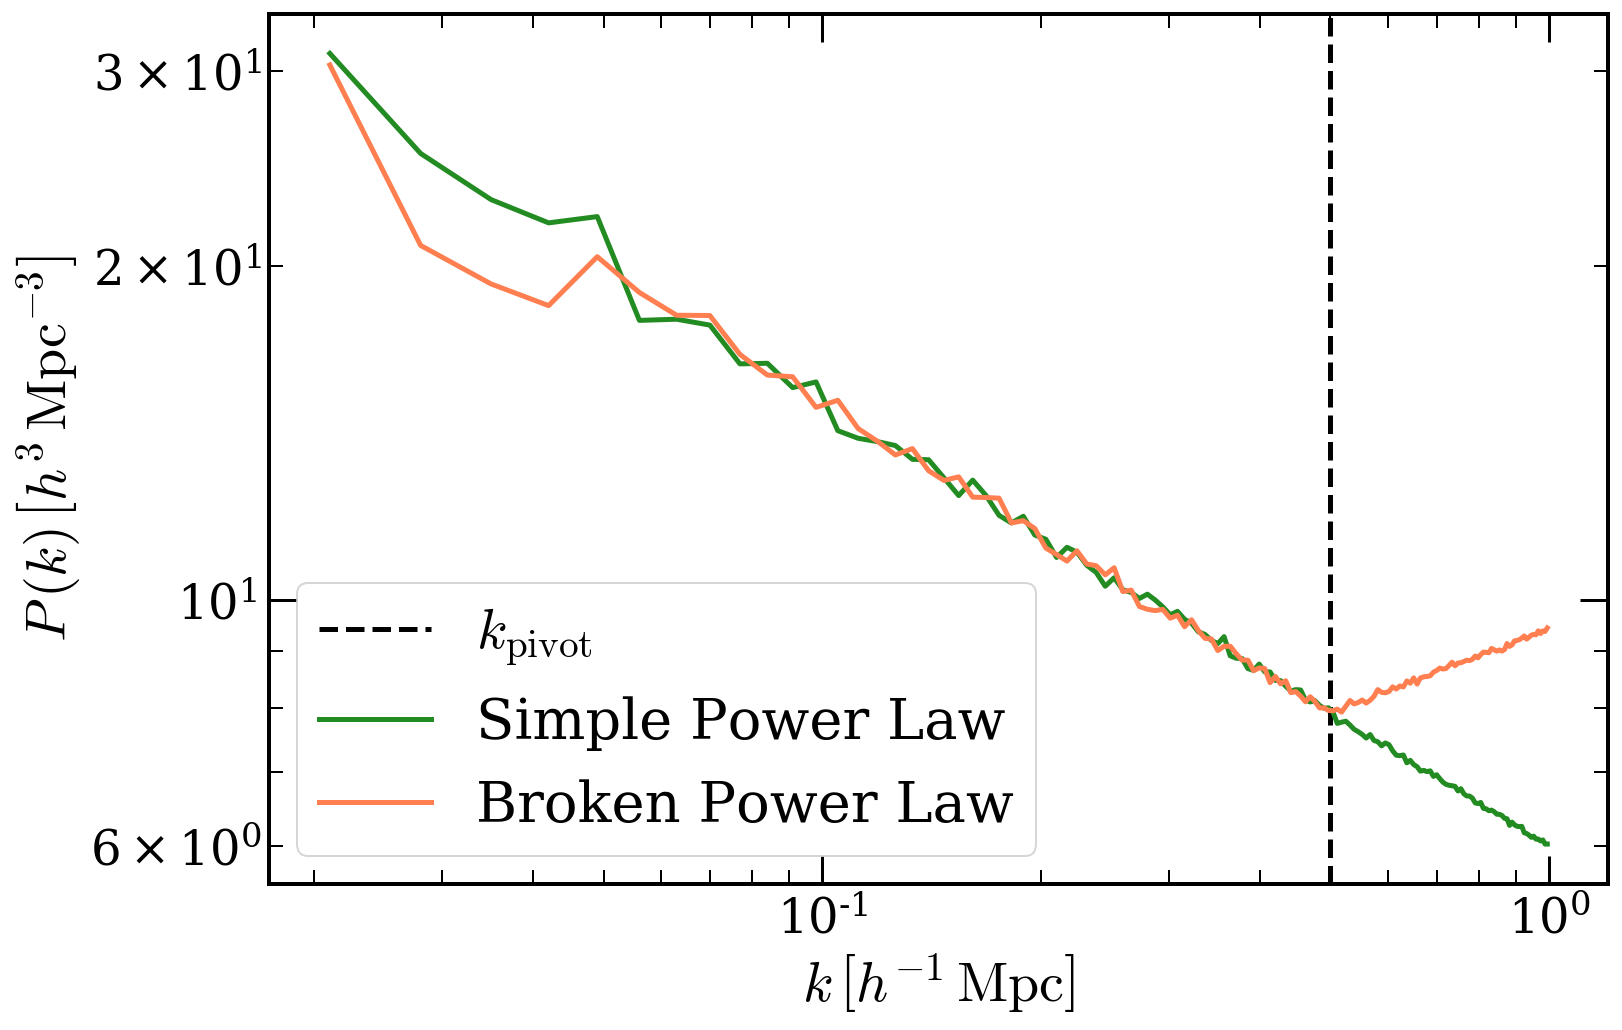

In [84]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.axvline(0.5, c = 'k', 
            ls = '--', 
            label = r'$k_{\mathrm{pivot}}$')
ax.loglog(k, Pk_SPL[0, 0], label='Simple Power Law', 
           c = 'forestgreen',)
ax.loglog(k, Pk[0, 0], label='Broken Power Law', 
           c = 'coral',)

ax.set_xlabel(r'$ k \, \left[h^{-1} \, \mathrm{Mpc}\right] $')
ax.set_ylabel(r'$ P \, (k) \, \left[h^{3} \, \mathrm{Mpc}^{-3}\right] $')
ax.legend(loc = 'best')
